In [1]:
import numpy as np
import pandas as pd 
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, auc, roc_curve, roc_auc_score, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import warnings
from math import sqrt
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

# Question 1

In [11]:
data = pd.read_csv('test_office.csv',header='infer')
data = data.drop('date',axis=1)
Y_test_office = data['Occupancy']
X_test_office = data.drop('Occupancy',axis=1)

data = pd.read_csv('train_office.csv',header='infer')
data = data.drop('date',axis=1)
Y_train_office = data['Occupancy']
X_train_office = data.drop('Occupancy',axis=1)

X_train_office.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


## 1.a

Text(0, 0.5, 'Accuracy')

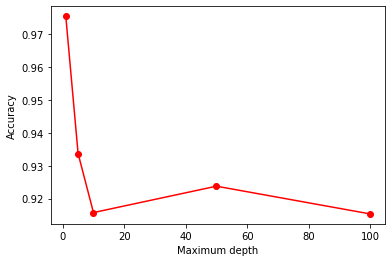

In [4]:
maxdepths = [1, 5, 10, 50, 100]
treeAcc = []

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train_office, Y_train_office, cv=5)
    treeAcc.append(scores.mean())

plt.plot(maxdepths, treeAcc, 'ro-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

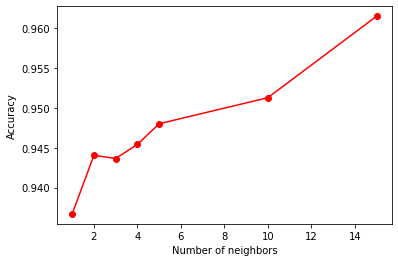

In [5]:
numNeighbors = [1, 2, 3, 4, 5, 10, 15]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X_train_office, Y_train_office, cv=5)
    knn_acc.append(scores.mean())
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

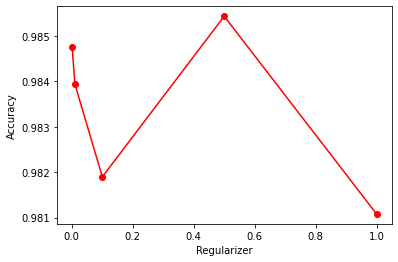

In [6]:
regularizers = [0.001, 0.01, 0.1, 0.5, 1]
logistic_acc = []
for C in regularizers:
    clf = LogisticRegression(C=C)
    scores = cross_val_score(clf, X_train_office, Y_train_office, cv=5)
    logistic_acc.append(scores.mean())
#print(list(zip(logistic_acc,regularizers)))

plt.plot(regularizers, logistic_acc, 'ro-')
plt.xlabel('Regularizer')
plt.ylabel('Accuracy')

## 1.b

For decision tree, maxdepth=1 results in the highest average cross validation accuracy 

For KNN, k=15 yields the highest peformance

For LR, C=0.5 is the best hyperparamter 

## 1.c

In [8]:
DT=tree.DecisionTreeClassifier(max_depth=1)
DT.fit(X_train_office,Y_train_office)

KNN=KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train_office,Y_train_office)

LR=LogisticRegression(C=0.5)
LR.fit(X_train_office,Y_train_office)

LogisticRegression(C=0.5)

## 1.d

In [12]:
DT_preds = DT.predict(X_test_office)
KNN_preds = KNN.predict(X_test_office)
LR_preds = LR.predict(X_test_office)

### i 

In [14]:
print("Confusion Matrix of Decision Tree classifier\n")
DT_conf_matrix=confusion_matrix(Y_test_office,DT_preds,labels=[0,1])
print(DT_conf_matrix)
print("\n")
print("Confusion Matrix of KNN classifier\n")
KNN_conf_matrix=confusion_matrix(Y_test_office,KNN_preds,labels=[0,1])
print(KNN_conf_matrix)
print("\n")
print("Confusion Matrix of Logistic Regression classifier\n")
LR_conf_matrix=confusion_matrix(Y_test_office,LR_preds,labels=[0,1])
print(LR_conf_matrix)

Confusion Matrix of Decision Tree classifier

[[641   6]
 [  1 149]]


Confusion Matrix of KNN classifier

[[641   6]
 [  1 149]]


Confusion Matrix of Logistic Regression classifier

[[641   6]
 [  0 150]]


### A facny way to visualize the confusion matrix. This is specially useful when you have many classes as it can reveal the classification patterns 

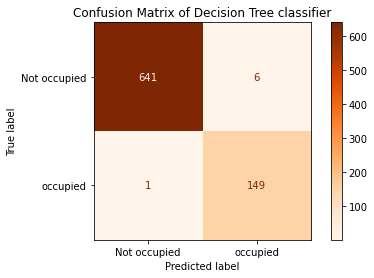

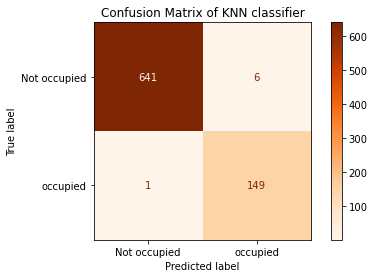

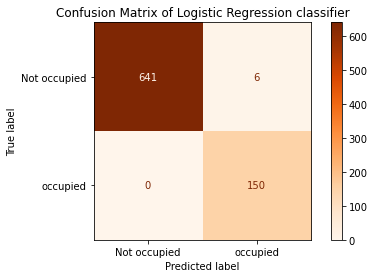

In [15]:
plt.rcParams["figure.figsize"] = (7,4)

disp=ConfusionMatrixDisplay(confusion_matrix=DT_conf_matrix, display_labels=['Not occupied','occupied'])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix of Decision Tree classifier")

disp=ConfusionMatrixDisplay(confusion_matrix=KNN_conf_matrix, display_labels=['Not occupied','occupied'])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix of KNN classifier")

disp=ConfusionMatrixDisplay(confusion_matrix=LR_conf_matrix, display_labels=['Not occupied','occupied'])
disp.plot(cmap='Oranges')
a=plt.title("Confusion Matrix of Logistic Regression classifier")


### ii

In [16]:
precision_dt,recal_dt,f1_dt,_=precision_recall_fscore_support(Y_test_office,DT_preds,average="weighted")
precision_knn,recal_knn,f1_knn,_=precision_recall_fscore_support(Y_test_office,KNN_preds,average="weighted")
precision_lr,recal_lr,f1_lr,_=precision_recall_fscore_support(Y_test_office,LR_preds,average="weighted")

In [17]:
print(precision_dt,recal_dt,f1_dt)
print(precision_knn,recal_knn,f1_knn)
print(precision_lr,recal_lr,f1_lr)

0.9914501383000037 0.9912170639899623 0.9912720208699549
0.9914501383000037 0.9912170639899623 0.9912720208699549
0.9927613164752438 0.9924717691342535 0.9925280406199902


In [ ]:

w = 0.2

labels = ['DT', 'KNN', 'LR']
dt_bar = np.arange(len(labels))

knn_bar = [i+w for i in dt_bar]

lr_bar = [i+w for i in knn_bar]
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(15, 6))
plt.bar(dt_bar, [precision_dt,precision_knn,precision_lr], width = w, label = 'Precision',color='blue')
plt.bar(knn_bar, [recal_dt,recal_knn,recal_lr], width = w, label = 'Recall',color='cyan')
plt.bar(lr_bar, [f1_dt,f1_knn,f1_lr], width = w, label = 'F1-score',color='gray')

plt.xticks(dt_bar+w, labels)
plt.title('Performace comparison of three predictive models')
plt.xlabel('Models')
plt.ylabel('Performance scores')
plt.ylim([0.98,0.998])
plt.legend()
plt.show()


### iii

In [21]:
predict_probs_DT= DT.predict_proba(X_test_office)
predict_probs_KNN=KNN.predict_proba(X_test_office)
predict_probs_LR= LR.predict_proba(X_test_office)


In [22]:
fpr_dt, tpr_dt, thresh_dt = roc_curve(Y_test_office, predict_probs_LR[:,1])
auc_dt = auc(fpr_dt,tpr_dt)

fpr_knn, tpr_knn, thresh_knn = roc_curve(Y_test_office, predict_probs_KNN[:,1])
auc_knn = auc(fpr_knn,tpr_knn)

fpr_lr, tpr_lr, thresh_lr = roc_curve(Y_test_office, predict_probs_LR[:,1])
auc_lr = auc(fpr_lr,tpr_lr)

print(auc_dt,auc_knn,auc_lr)

0.9974652241112828 0.9995002575991756 0.9974652241112828


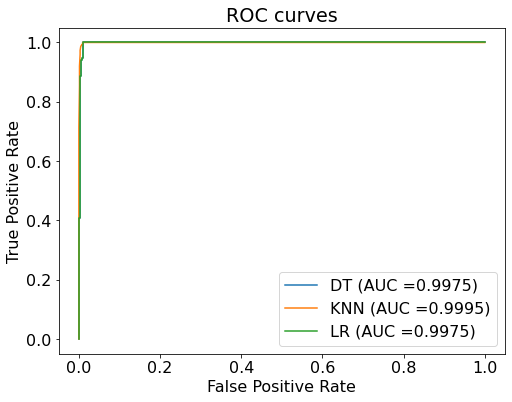

In [23]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(fpr_dt,tpr_dt,label="DT (AUC ="+str(round(auc_dt,4))+")")
plt.plot(fpr_knn,tpr_knn,label="KNN (AUC ="+str(round(auc_knn,4))+")")
plt.plot(fpr_lr,tpr_lr,label="LR (AUC ="+str(round(auc_lr,4))+")")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()

## 1.e

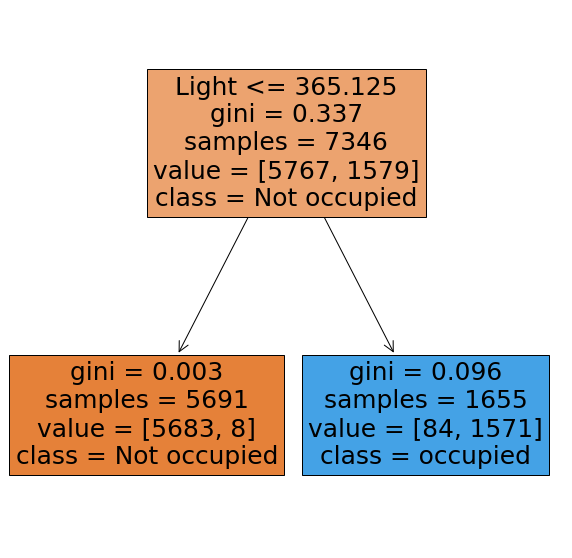

In [30]:
fig = plt.figure(figsize=(10,10))
feat_names=list(X_test_office.columns)
_=tree.plot_tree(DT, 
                   feature_names=feat_names,  
                   class_names=['Not occupied','occupied'],
                   filled=True)


It seems the 'Light' is a very important feature

# Question 2 

## 2.a

In [43]:
RF = RandomForestClassifier(random_state=200)

hyperparams = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 8, 10],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

grid = GridSearchCV(estimator=RF, param_grid=hyperparams, cv=5, verbose=2)
grid.fit(X_train_office, Y_train_office)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criteri

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
0.9776777205095788


In [47]:
RF_best= RandomForestClassifier(criterion='entropy',n_estimators=50,
                                max_depth=5,min_samples_split=2,min_samples_leaf=10)
RF_best.fit(X_train_office,Y_train_office)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       n_estimators=50)

## 2.b

In [61]:
y_pred = RF_best.predict(X_test_office)
precision, recall, f1, _ = precision_recall_fscore_support(Y_test_office, y_pred, average='weighted')
y_scores=RF_best.predict_proba(X_test_office)
acc = accuracy_score(Y_test_office, y_pred)
fpr_rf, tpr_rf, _ = roc_curve(Y_test_office, y_scores[:,1])
auc_rf = auc(fpr_rf,tpr_rf)

print('Performance of Random Forest classifier with tuned hyperparameters:')
print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc_rf}')

Performance of Random Forest classifier with tuned hyperparameters:
Accuracy: 0.9949811794228356
Precision: 0.9949811794228356
Recall: 0.9949811794228356
F1 Score: 0.9949811794228356
AUC: 0.9995672333848532


Text(0.5, 1.0, 'ROC curve of Random Forest classifier with tuned hyperparameters')

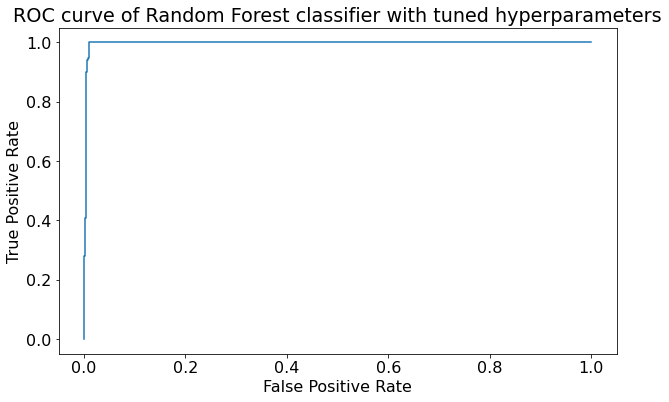

In [62]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(fpr_dt,tpr_dt)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Random Forest classifier with tuned hyperparameters")


The performance of RF is close to other three predictive models. It seems that this dataset is not very complicated and different predictive models can perfectly predict the labels of unseen samples.

# Question 3

In [2]:
msft_data  = pd.read_csv('msft.csv')

X = msft_data.drop('Adj Close', axis=1)
X = msft_data.drop('Date', axis=1)
Y = msft_data['Adj Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=545)
X_train.head()

,Open,High,Low,Close,Volume,Adj Close
1238,29.660000,29.700001,29.230000,29.530001,50572400,25.707003
475,42.660000,43.090000,42.509998,43.090000,33268800,40.827698
830,33.380001,33.500000,32.730000,32.799999,52839700,30.021943
1571,24.059999,24.450001,23.910000,24.350000,78152900,20.522930
252,56.040001,56.189999,55.419998,55.480000,26529600,53.998276


## 3.a

In [3]:
def hyperparameter_tunning_dt_reg(transformation=None):
    if transformation is not None:
        X_train_=transformation.fit_transform(X_train)
        X_test_=transformation.transform(X_test)
    else:
        X_train_=X_train
        X_test_ =X_test
    DT_Reg = DecisionTreeRegressor()
    hyperparams = {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_depth': [1, 2, 5, 10],
        'min_samples_split': [2, 3, 5, 8, 10],
        'min_samples_leaf': [1, 2, 5, 7, 10]}


    grid = GridSearchCV(DT_Reg, param_grid = hyperparams, cv=5, n_jobs=-1, verbose=2)
    grid.fit(X_train_, Y_train)
    best_hyperparams= grid.best_params_
    
    RF_reg_best=DecisionTreeRegressor(**best_hyperparams)
    RF_reg_best.fit(X_train_,Y_train)


    return RF_reg_best, X_test_, best_hyperparams

## 3.b 

In [4]:
RF_reg_best_b, X_test_b, best_params_b= hyperparameter_tunning_dt_reg()

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [6]:
preds = RF_reg_best_b.predict(X_test_b)
mean_squared_error(Y_test,preds,squared=False)

0.09158484141723555

## 3.c

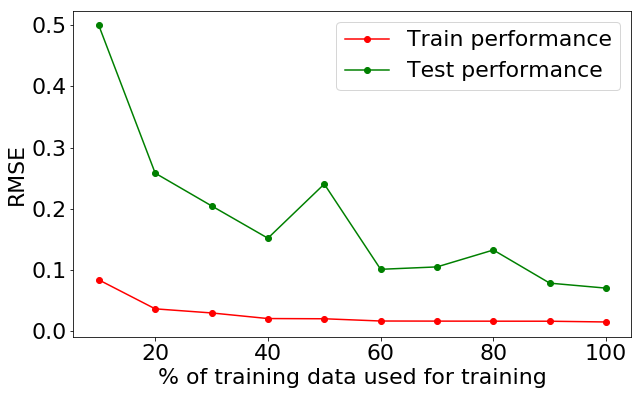

In [21]:
train_rmses=[]
test_rmses=[]

for i in range(10,110,10):
    p=int((i/100)*len(X_train))
    X=X_train[0:p]
    Y=Y_train[0:p]
    RF_reg_=DecisionTreeRegressor(**best_params_b)
    RF_reg_.fit(X,Y)
    
    train_preds=RF_reg_.predict(X)
    test_preds=RF_reg_.predict(X_test)
    
    train_rmse=mean_squared_error(Y,train_preds,squared=False)
    test_rmse=mean_squared_error(Y_test,test_preds,squared=False)
    
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    #print(train_rmse,test_rmse)

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 22})
plt.plot(list(range(10,110,10)), train_rmses, 'ro-', label='Train performance')
plt.plot(list(range(10,110,10)), test_rmses, 'go-', label="Test performance")
plt.xlabel("% of training data used for training")
plt.ylabel("RMSE")
plt.legend()
# plt.show()

The training error doesn't change that much. However, the more data is usef for training, the better the test performance. Also, as the size of training data increases, the difference of performance between test and training decreases (i.e., less overfitting)

## 3.d

In [22]:
transformation=StandardScaler()
RF_reg_best_s, X_test_s, best_params_s= hyperparameter_tunning_dt_reg(transformation=transformation)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [25]:
preds = RF_reg_best_s.predict(X_test_s)
mean_squared_error(Y_test,preds,squared=False)

0.06821283682965906

In [23]:
transformation=MinMaxScaler()
RF_reg_best_m, X_test_m, best_params_m= hyperparameter_tunning_dt_reg(transformation=transformation)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [26]:
preds = RF_reg_best_m.predict(X_test_m)
mean_squared_error(Y_test,preds,squared=False)

0.08367963692635459

In [34]:
transformation=Normalizer(norm='l2')
RF_reg_best_n, X_test_n, best_params_n= hyperparameter_tunning_dt_reg(transformation=transformation)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [35]:
preds = RF_reg_best_n.predict(X_test_n)
mean_squared_error(Y_test,preds,squared=False)

4.690986517918001

Standard and min-max scalings help in better performance (lower rmse) while mormalization increases rmse significantly. One main reason is that the norm of the feature vectors are very large, so after the mormalization, makes the feature values very small:

In [41]:
X_test_n

array([[4.78173744e-07, 4.81591612e-07, 4.65804408e-07, 4.65804408e-07,
        1.00000000e+00, 3.72672842e-07],
       [3.76813242e-07, 3.82570401e-07, 3.71394728e-07, 3.80425591e-07,
        1.00000000e+00, 3.03186352e-07],
       [4.63214533e-07, 4.64310714e-07, 4.57577018e-07, 4.61335351e-07,
        1.00000000e+00, 3.63998005e-07],
       ...,
       [5.07236365e-07, 5.12051879e-07, 5.03825361e-07, 5.10246054e-07,
        1.00000000e+00, 4.30051085e-07],
       [7.29955705e-07, 7.37556653e-07, 7.27596781e-07, 7.35721962e-07,
        1.00000000e+00, 6.23899169e-07],
       [3.67411360e-07, 3.69395733e-07, 3.62374146e-07, 3.65274360e-07,
        1.00000000e+00, 3.07864481e-07]])